### Data Preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv('data/Hotel_Reviews.csv')
df.columns = df.columns.str.lower()

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [ ]:
df.loc[df['positive_review'] == 'No Positive', 'positive_review'] = ''
df.loc[df['negative_review'] == 'No Negative', 'negative_review'] = ''

df['positive_review'].describe()

count     515738
unique    412601
top             
freq       35946
Name: positive_review, dtype: object

In [ ]:
# df = df.sample(frac=0.001, random_state=22).reset_index(drop=True).copy()

# df

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_string_and_keep_nouns(input_string):
    doc = nlp(input_string)
    lemmatized_words = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
    return " ".join(lemmatized_words)

'Done'

'Done'

In [ ]:
df['positive_review_lem'] = df['positive_review'].apply(lemmatize_string_and_keep_nouns)

df['positive_review_lem']

0                                                park hotel
1         complaint hotel location surrounding room amen...
2                               staff hotel breakfast range
3         location surrounding bar restaurant area build...
4                                          location setting
                                ...                        
515733                                             location
515734                                                check
515735                                                     
515736                             room family member space
515737                                                staff
Name: positive_review_lem, Length: 515738, dtype: object

In [ ]:
df['negative_review_lem'] = df['negative_review'].apply(lemmatize_string_and_keep_nouns)

df['negative_review_lem']

0         post site trip one mistake place booking com n...
1                                                          
2         room bit room story step level room tea coffee...
3         room floor week furniture picture door dog sho...
4         company line picture room room staff suite adv...
                                ...                        
515733                            trolly staff luggage room
515734                                                hotel
515735                                      week vienna air
515736                                                     
515737                                         floor t work
Name: negative_review_lem, Length: 515738, dtype: object

In [ ]:
df.to_csv('./data/hotel_reviews_preprocessed.csv', index=False)

### EDA and Model

In [ ]:
import pandas as pd

df = pd.read_csv('./data/Hotel_Reviews.csv')
df.loc[df['Positive_Review'] == 'No Positive', 'Positive_Review'] = ''
df.loc[df['Negative_Review'] == 'No Negative', 'Negative_Review'] = ''

df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

positive_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

positive_words = positive_vectorizer.fit_transform(df['Positive_Review'])

positive_words

<515738x926 sparse matrix of type '<class 'numpy.int64'>'
	with 3764521 stored elements in Compressed Sparse Row format>

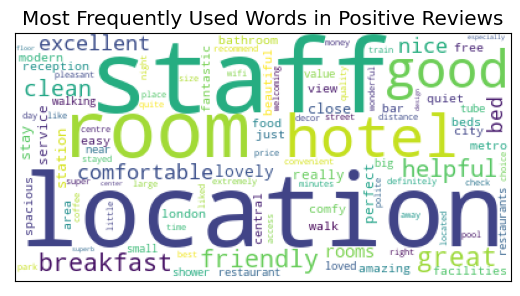

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.size'] = 12

positive_word_freq_dict = dict(zip(positive_vectorizer.get_feature_names_out(), np.asarray(positive_words.mean(axis=0))[0]))

positive_wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(positive_word_freq_dict)

plt.figure()

plt.imshow(positive_wordcloud)
plt.xticks([])
plt.yticks([])

plt.title('Most Frequently Used Words in Positive Reviews')

plt.show()

In [ ]:
negative_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

negative_words = negative_vectorizer.fit_transform(df['Negative_Review'])

negative_words

<515738x1126 sparse matrix of type '<class 'numpy.int64'>'
	with 2954210 stored elements in Compressed Sparse Row format>

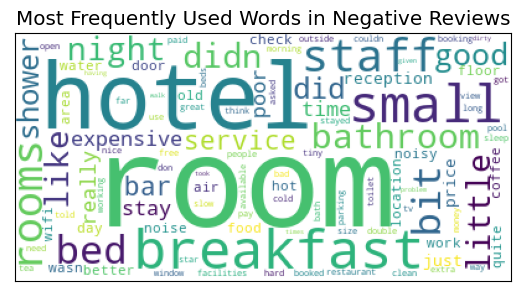

In [ ]:
negative_word_freq_dict = dict(zip(negative_vectorizer.get_feature_names_out(), np.asarray(negative_words.mean(axis=0))[0]))

wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(negative_word_freq_dict)

plt.figure()

plt.imshow(wordcloud)
plt.xticks([])
plt.yticks([])

plt.title('Most Frequently Used Words in Negative Reviews')

plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('./data/hotel_reviews_preprocessed.csv')
df.loc[df['positive_review_lem'].isna(), 'positive_review_lem'] = ''
df.loc[df['negative_review_lem'].isna(), 'negative_review_lem'] = ''

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,positive_review_lem,negative_review_lem
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,park hotel,post site trip one mistake place booking com n...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,complaint hotel location surrounding room amen...,
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,staff hotel breakfast range,room bit room story step level room tea coffee...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,location surrounding bar restaurant area build...,room floor week furniture picture door dog sho...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,location setting,company line picture room room staff suite adv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,location,trolly staff luggage room
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,check,hotel
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,NaN,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,,week vienna air
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,NaN,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,room family member space,


In [ ]:
len(df['hotel_address'].unique())

1493

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

positive_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

positive_words = positive_vectorizer.fit_transform(df['positive_review_lem'])

positive_words

<515738x382 sparse matrix of type '<class 'numpy.int64'>'
	with 1664061 stored elements in Compressed Sparse Row format>

In [ ]:
from nltk.corpus import words

english_words = set(words.words())

valid_word = [True if word in english_words else False for word in positive_vectorizer.get_feature_names_out()]

sum(valid_word)

355

In [ ]:
positive_words = positive_words[:, valid_word]

positive_words

<515738x355 sparse matrix of type '<class 'numpy.int64'>'
	with 1611564 stored elements in Compressed Sparse Row format>

In [ ]:
positive_words_labels = positive_vectorizer.get_feature_names_out()[valid_word]

positive_words_labels

array(['access', 'accommodation', 'addition', 'advice', 'afternoon',
       'air', 'airport', 'ambience', 'amenity', 'anniversary',
       'apartment', 'area', 'arena', 'arrival', 'art', 'atmosphere',
       'attention', 'attitude', 'attraction', 'bag', 'balcony', 'bar',
       'base', 'bath', 'bathroom', 'beach', 'bed', 'bedroom', 'bike',
       'birthday', 'biscuit', 'bit', 'block', 'board', 'bonus', 'book',
       'booking', 'bottle', 'brand', 'bread', 'break', 'breakfast',
       'buffet', 'building', 'bus', 'business', 'cake', 'canal', 'car',
       'card', 'care', 'case', 'ceiling', 'center', 'champagne',
       'channel', 'character', 'charge', 'charm', 'check', 'cheese',
       'child', 'chocolate', 'choice', 'city', 'class', 'cleaning',
       'cleanliness', 'club', 'cocktail', 'coffee', 'comfort',
       'complaint', 'concert', 'concierge', 'condition', 'connection',
       'convenience', 'cor', 'corner', 'cost', 'couple', 'course',
       'courtyard', 'curtain', 'customer', 

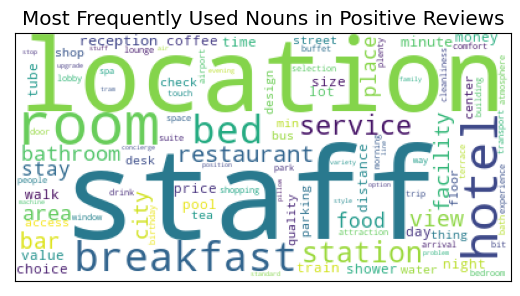

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.size'] = 12

positive_word_freq_dict = dict(zip(positive_words_labels, np.asarray(positive_words.mean(axis=0))[0]))

positive_wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(positive_word_freq_dict)

plt.figure()

plt.imshow(positive_wordcloud)
plt.xticks([])
plt.yticks([])

plt.title('Most Frequently Used Nouns in Positive Reviews')

plt.show()

In [ ]:
negative_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

negative_words = negative_vectorizer.fit_transform(df['negative_review_lem'])

negative_words

<515738x448 sparse matrix of type '<class 'numpy.int64'>'
	with 1383518 stored elements in Compressed Sparse Row format>

In [ ]:
valid_word = [True if word in english_words else False for word in negative_vectorizer.get_feature_names_out()]

sum(valid_word)

421

In [ ]:
negative_words = negative_words[:, valid_word]

negative_words

<515738x421 sparse matrix of type '<class 'numpy.int64'>'
	with 1323912 stored elements in Compressed Sparse Row format>

In [ ]:
negative_words_labels = negative_vectorizer.get_feature_names_out()[valid_word]

negative_words_labels

array(['access', 'accommodation', 'account', 'addition', 'adult',
       'advance', 'afternoon', 'age', 'air', 'airport', 'alarm',
       'amenity', 'answer', 'apartment', 'apology', 'area', 'arrival',
       'atmosphere', 'attention', 'attitude', 'attraction', 'baby',
       'bacon', 'bag', 'balcony', 'bank', 'bar', 'basement', 'basin',
       'bath', 'bathrobe', 'bathroom', 'bathtub', 'bed', 'bedroom',
       'bedside', 'beer', 'birthday', 'biscuit', 'bit', 'blanket',
       'board', 'body', 'book', 'booking', 'bottle', 'box', 'bread',
       'breakfast', 'buffet', 'building', 'bus', 'business', 'car',
       'card', 'care', 'carpet', 'case', 'cash', 'ceiling', 'center',
       'chair', 'change', 'channel', 'charge', 'check', 'cheese', 'child',
       'choice', 'cigarette', 'city', 'cleaner', 'cleaning',
       'cleanliness', 'client', 'closet', 'clothe', 'club', 'cocktail',
       'coffee', 'comfort', 'comment', 'communication', 'complaint',
       'computer', 'concierge', 'conditio

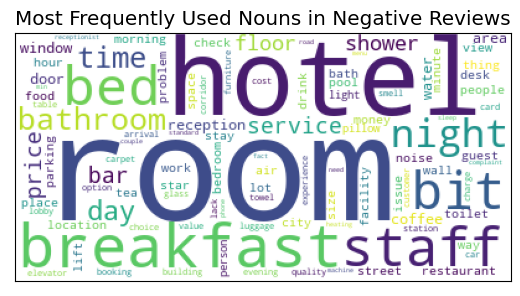

In [ ]:
negative_word_freq_dict = dict(zip(negative_words_labels, np.asarray(negative_words.mean(axis=0))[0]))

wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(negative_word_freq_dict)

plt.figure()

plt.imshow(wordcloud)
plt.xticks([])
plt.yticks([])

plt.title('Most Frequently Used Nouns in Negative Reviews')

plt.show()

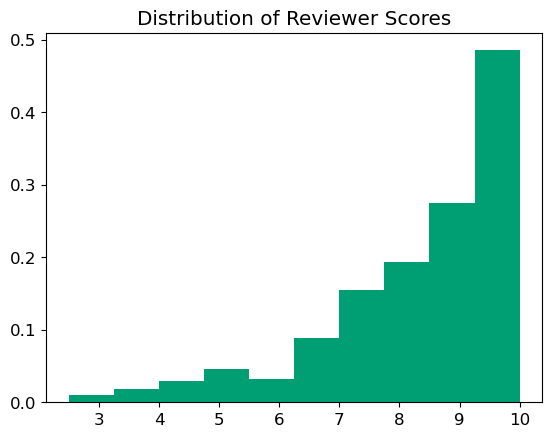

In [ ]:
plt.hist(df['reviewer_score'], color='#009E73', density=True)

plt.title('Distribution of Reviewer Scores')

plt.show()

In [ ]:
# df['reviewer_score'] = (df['reviewer_score'] - df['reviewer_score'].min())/(df['reviewer_score'].max() - df['reviewer_score'].min())*4 + 1

# df['reviewer_score'].describe()

In [ ]:
# plt.hist(df['reviewer_score'], color='#009E73', density=True)

# plt.title('Distribution of Review Scores')

# plt.show()

In [ ]:
X = np.hstack((positive_words.toarray().astype('uint8'), negative_words.toarray().astype('uint8')))
y = df['reviewer_score'].to_numpy()

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=3, shuffle=True, random_state=22)

def get_cv_mse(alpha, l1_ratio, kf=kf, X=X, y=y):
    if l1_ratio == 0:
        mod = Ridge(alpha=alpha)
    elif l1_ratio == 1:
        mod = Lasso(alpha=alpha)
    else:
        mod = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    predictions = np.array([])
    actuals = np.array([])
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train = X[train_index]
        y_train = y[train_index]

        X_test = X[test_index]
        y_test = y[test_index]

        mod.fit(X_train, y_train)

        predictions = np.concatenate((predictions, mod.predict(X_test)))
        actuals = np.concatenate((actuals, np.array(y_test)))
    
    return mod, mean_squared_error(actuals, predictions)

best_mod = None
best_mse = None
alphas = []
l1_ratios = []
mses = []
for alpha in [10**(v) for v in range(-3, 4)]:
    for l1_ratio in [0, 0.25, 0.5, 0.75, 1]:
        mod, mse = get_cv_mse(alpha, l1_ratio)

        # for plot
        alphas.append(alpha)
        l1_ratios.append(l1_ratio)
        mses.append(mse)

        print(f'mod: {mod}, mse: {mse}')
        
        if not best_mse:
            best_mod = mod
            best_mse = mse
        elif mse < best_mse:
            best_mod = mod
            best_mse = mse

best_mod, best_mse

mod: Ridge(alpha=0.001), mse: 1.7140477624376829
mod: ElasticNet(alpha=0.001, l1_ratio=0.25), mse: 1.7247572246593676
mod: ElasticNet(alpha=0.001), mse: 1.7347461618067328
mod: ElasticNet(alpha=0.001, l1_ratio=0.75), mse: 1.7435771418973007
mod: Lasso(alpha=0.001), mse: 1.751494696465957
mod: Ridge(alpha=0.01), mse: 1.7140476517711816
mod: ElasticNet(alpha=0.01, l1_ratio=0.25), mse: 1.8168343771930975
mod: ElasticNet(alpha=0.01), mse: 1.8535646307436535
mod: ElasticNet(alpha=0.01, l1_ratio=0.75), mse: 1.879915460799111
mod: Lasso(alpha=0.01), mse: 1.902465438775651
mod: Ridge(alpha=0.1), mse: 1.7140465461306744
mod: ElasticNet(alpha=0.1, l1_ratio=0.25), mse: 2.10706468757021
mod: ElasticNet(alpha=0.1), mse: 2.184482959614257
mod: ElasticNet(alpha=0.1, l1_ratio=0.75), mse: 2.2592008386719065
mod: Lasso(alpha=0.1), mse: 2.3319350866225363
mod: Ridge(alpha=1), mse: 1.714035591844452
mod: ElasticNet(alpha=1, l1_ratio=0.25), mse: 2.682578042243737
mod: ElasticNet(alpha=1), mse: 2.6825780422

(Ridge(alpha=100), 1.713682994878016)

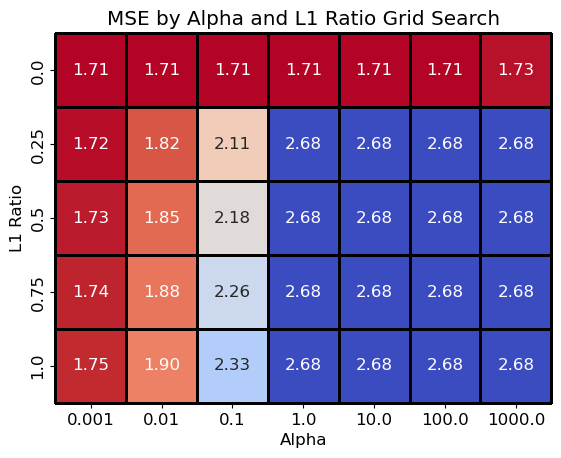

In [ ]:
import seaborn as sns

df_gridsearch = pd.DataFrame(
    {
        'Alpha': alphas,
        'L1 Ratio': l1_ratios,
        'MSE': mses
    }
).pivot(index='L1 Ratio', columns='Alpha', values='MSE')

sns.heatmap(df_gridsearch, annot=True, fmt='.2f', cmap='coolwarm_r', cbar=False, 
            linewidths=1, linecolor='black', clip_on=False)

plt.title('MSE by Alpha and L1 Ratio Grid Search')

plt.show()

In [ ]:
mod = best_mod

mod.fit(X, y)

mean_squared_error(y, mod.predict(X))

1.7073054101780463

In [ ]:
df_feature_values = pd.DataFrame(
    {
        'Word': np.concatenate((
            [s for s in positive_words_labels], 
            [s for s in negative_words_labels]
        )),
        'Review Type': np.concatenate((
            ['Positive' for s in positive_words_labels], 
            ['Negative' for s in negative_words_labels]
        )),
        'Frequency': np.concatenate((
            np.asarray(positive_words.sum(axis=0))[0], np.asarray(negative_words.sum(axis=0))[0]
        )),
        'Value': mod.coef_
    }
)

df_feature_values['Frequency'] = df_feature_values['Frequency']/df.shape[0]

df_feature_values.sort_values(by=['Value'], ascending=False, inplace=True, ignore_index=True)

df_feature_values.head(25)

,Word,Review Type,Frequency,Value
0,staff,Positive,0.294242,0.515259
1,superb,Positive,0.002846,0.391506
2,trouble,Positive,0.003843,0.383523
3,pleasure,Positive,0.001202,0.368319
4,stuff,Positive,0.005334,0.359773
5,class,Positive,0.003238,0.359002
6,service,Positive,0.046351,0.357923
7,fault,Negative,0.003453,0.356096
8,home,Positive,0.003874,0.346978
9,personnel,Positive,0.002523,0.339499


In [ ]:
df_feature_values.tail(25).iloc[::-1]

,Word,Review Type,Frequency,Value
775,attitude,Negative,0.002579,-0.833195
774,cleanliness,Negative,0.001912,-0.815297
773,staff,Negative,0.055743,-0.752625
772,money,Negative,0.013598,-0.741426
771,furniture,Negative,0.006133,-0.732182
770,refund,Negative,0.001483,-0.707058
769,room,Negative,0.255331,-0.704267
768,star,Negative,0.015147,-0.685385
767,carpet,Negative,0.007302,-0.675117
766,picture,Negative,0.004006,-0.666640


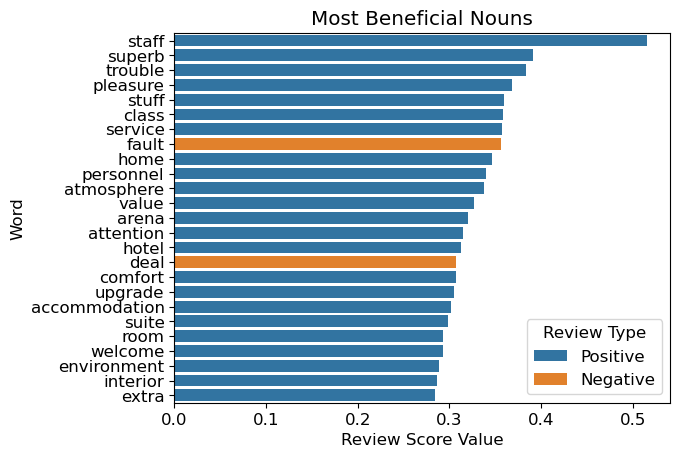

In [ ]:
ax = sns.barplot(data=df_feature_values.head(25), x='Value', y='Word', hue='Review Type', dodge=False)
sns.move_legend(ax, 'lower right')

plt.title('Most Beneficial Nouns')
plt.xlabel('Review Score Value')

plt.show()

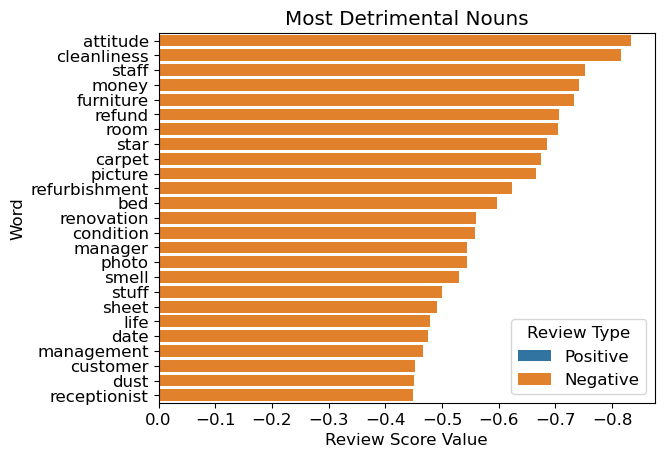

In [ ]:
df_feature_values_tail = df_feature_values.tail(25)

# make positive show in legend
df_feature_values_tail = pd.concat(
    [df_feature_values_tail, pd.DataFrame({'Word': [df_feature_values['Word'].iloc[-1]], 'Review Type': ['Positive'], 'Value': [0.0]})]
)

sns.barplot(data=df_feature_values_tail.iloc[::-1], x='Value', y='Word', hue='Review Type', dodge=False)
plt.gca().invert_xaxis()

plt.title('Most Detrimental Nouns')
plt.xlabel('Review Score Value')

plt.show()

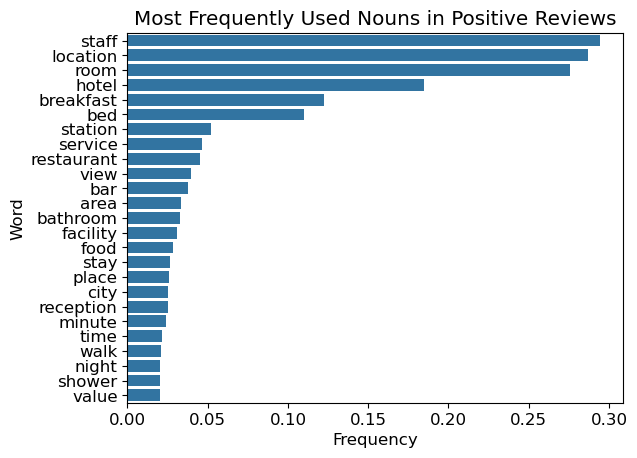

In [ ]:
df_positive = df_feature_values.loc[df_feature_values['Review Type'] == 'Positive', :].sort_values(by=['Frequency'], ascending=False)

sns.barplot(data=df_positive.head(25), x='Frequency', y='Word', color='#1f77b4')

plt.title('Most Frequently Used Nouns in Positive Reviews')

plt.show()

In [ ]:
df_positive.head(25)

,Word,Review Type,Frequency,Value
0,staff,Positive,0.294242,0.515259
198,location,Positive,0.287175,0.086569
20,room,Positive,0.275752,0.293463
14,hotel,Positive,0.184631,0.312806
89,breakfast,Positive,0.122741,0.172517
35,bed,Positive,0.109837,0.256112
359,station,Positive,0.052282,0.008054
6,service,Positive,0.046351,0.357923
148,restaurant,Positive,0.045128,0.117099
49,view,Positive,0.039512,0.223934


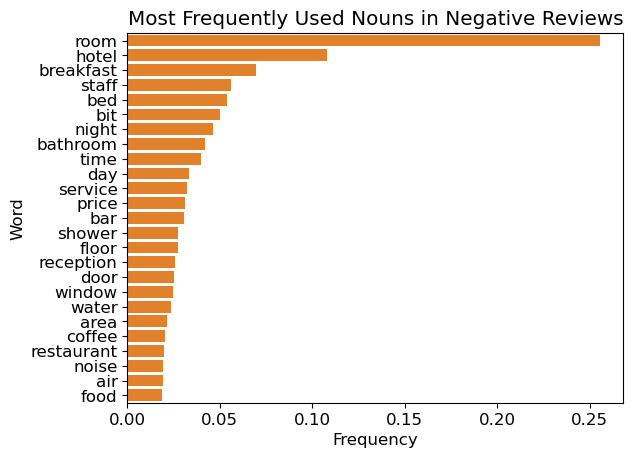

In [ ]:
df_negative = df_feature_values.loc[df_feature_values['Review Type'] == 'Negative', :].sort_values(by=['Frequency'], ascending=False)

sns.barplot(data=df_negative.head(25), x='Frequency', y='Word', color='#ff7f0e')

plt.title('Most Frequently Used Nouns in Negative Reviews')

plt.show()

In [ ]:
df_negative.head(25)

,Word,Review Type,Frequency,Value
769,room,Negative,0.255331,-0.704267
741,hotel,Negative,0.108078,-0.380691
679,breakfast,Negative,0.069508,-0.213290
773,staff,Negative,0.055743,-0.752625
764,bed,Negative,0.054014,-0.596173
66,bit,Negative,0.050287,0.206203
664,night,Negative,0.046303,-0.192502
745,bathroom,Negative,0.042111,-0.389816
454,time,Negative,0.039536,-0.035040
573,day,Negative,0.033546,-0.107276


In [ ]:
df.loc[df['positive_review'].str.contains('superb', na=False), 'positive_review'].sample(1).iloc[0]

' The location was superb it is a 2 minute walk to the Pantheon the Notre Dame and the Seine The staff were really friendly and the room was always clean the cleaner even tidied my shoes into a neat line when we came back after our day out The free bottles of water everyday were a nice touch and definitely needed I liked that the hotel was set back from the road and so it was quiet Would definitely return '

### Factor Analysis in Recommendation System

In [ ]:
import pandas as pd

df = pd.read_csv('./data/hotel_reviews_preprocessed.csv')
df.loc[df['positive_review_lem'].isna(), 'positive_review_lem'] = ''
df.loc[df['negative_review_lem'].isna(), 'negative_review_lem'] = ''

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,positive_review_lem,negative_review_lem
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,park hotel,post site trip one mistake place booking com n...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,complaint hotel location surrounding room amen...,
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,staff hotel breakfast range,room bit room story step level room tea coffee...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,location surrounding bar restaurant area build...,room floor week furniture picture door dog sho...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,location setting,company line picture room room staff suite adv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,location,trolly staff luggage room
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,check,hotel
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,NaN,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,,week vienna air
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,NaN,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,room family member space,


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

positive_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

positive_words = positive_vectorizer.fit_transform(df['positive_review_lem'])

positive_words

<515738x382 sparse matrix of type '<class 'numpy.int64'>'
	with 1664061 stored elements in Compressed Sparse Row format>

In [ ]:
from nltk.corpus import words

english_words = set(words.words())

valid_word = [True if word in english_words else False for word in positive_vectorizer.get_feature_names_out()]

sum(valid_word)

355

In [ ]:
positive_words = positive_words[:, valid_word]

positive_words

<515738x355 sparse matrix of type '<class 'numpy.int64'>'
	with 1611564 stored elements in Compressed Sparse Row format>

In [ ]:
positive_words_labels = positive_vectorizer.get_feature_names_out()[valid_word]

positive_words_labels

array(['access', 'accommodation', 'addition', 'advice', 'afternoon',
       'air', 'airport', 'ambience', 'amenity', 'anniversary',
       'apartment', 'area', 'arena', 'arrival', 'art', 'atmosphere',
       'attention', 'attitude', 'attraction', 'bag', 'balcony', 'bar',
       'base', 'bath', 'bathroom', 'beach', 'bed', 'bedroom', 'bike',
       'birthday', 'biscuit', 'bit', 'block', 'board', 'bonus', 'book',
       'booking', 'bottle', 'brand', 'bread', 'break', 'breakfast',
       'buffet', 'building', 'bus', 'business', 'cake', 'canal', 'car',
       'card', 'care', 'case', 'ceiling', 'center', 'champagne',
       'channel', 'character', 'charge', 'charm', 'check', 'cheese',
       'child', 'chocolate', 'choice', 'city', 'class', 'cleaning',
       'cleanliness', 'club', 'cocktail', 'coffee', 'comfort',
       'complaint', 'concert', 'concierge', 'condition', 'connection',
       'convenience', 'cor', 'corner', 'cost', 'couple', 'course',
       'courtyard', 'curtain', 'customer', 

In [ ]:
X_positive = pd.DataFrame(positive_words.toarray(), columns=positive_words_labels)

X_positive

,access,accommodation,addition,advice,afternoon,air,airport,ambience,amenity,anniversary,...,week,weekend,welcome,welcoming,wife,window,wine,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
negative_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

negative_words = negative_vectorizer.fit_transform(df['negative_review_lem'])

negative_words

<515738x448 sparse matrix of type '<class 'numpy.int64'>'
	with 1383518 stored elements in Compressed Sparse Row format>

In [ ]:
valid_word = [True if word in english_words else False for word in negative_vectorizer.get_feature_names_out()]

sum(valid_word)

421

In [ ]:
negative_words = negative_words[:, valid_word]

negative_words

<515738x421 sparse matrix of type '<class 'numpy.int64'>'
	with 1323912 stored elements in Compressed Sparse Row format>

In [ ]:
negative_words_labels = negative_vectorizer.get_feature_names_out()[valid_word]

negative_words_labels

array(['access', 'accommodation', 'account', 'addition', 'adult',
       'advance', 'afternoon', 'age', 'air', 'airport', 'alarm',
       'amenity', 'answer', 'apartment', 'apology', 'area', 'arrival',
       'atmosphere', 'attention', 'attitude', 'attraction', 'baby',
       'bacon', 'bag', 'balcony', 'bank', 'bar', 'basement', 'basin',
       'bath', 'bathrobe', 'bathroom', 'bathtub', 'bed', 'bedroom',
       'bedside', 'beer', 'birthday', 'biscuit', 'bit', 'blanket',
       'board', 'body', 'book', 'booking', 'bottle', 'box', 'bread',
       'breakfast', 'buffet', 'building', 'bus', 'business', 'car',
       'card', 'care', 'carpet', 'case', 'cash', 'ceiling', 'center',
       'chair', 'change', 'channel', 'charge', 'check', 'cheese', 'child',
       'choice', 'cigarette', 'city', 'cleaner', 'cleaning',
       'cleanliness', 'client', 'closet', 'clothe', 'club', 'cocktail',
       'coffee', 'comfort', 'comment', 'communication', 'complaint',
       'computer', 'concierge', 'conditio

In [ ]:
X_negative = pd.DataFrame(negative_words.toarray(), columns=negative_words_labels)

X_negative

,access,accommodation,account,addition,adult,advance,afternoon,age,air,airport,...,week,weekend,wife,window,wine,woman,word,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515735,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
515736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_X = X_positive.subtract(X_negative, fill_value=0).astype('int8')

df_X

,access,accommodation,account,addition,adult,advance,advice,afternoon,age,air,...,welcome,welcoming,wife,window,wine,woman,word,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
515735,0,0,0,0,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
515736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
service_words = [
    'attitude', 
    'manager', 
    'management', 
    'receptionist', 
    'personnel'
]

service = df_X.loc[:, service_words].sum(1)

service

0         0
1         0
2         0
3        -1
4         0
         ..
515733    0
515734    0
515735    0
515736    0
515737    0
Length: 515738, dtype: int64

In [ ]:
cleanliness_words = [
    'cleanliness', 
    'smell', 
    'dust', 
    'refurbishment', 
    'condition'
]

cleanliness = df_X.loc[:, cleanliness_words].sum(1)

cleanliness

0        -1
1         0
2         0
3         0
4         0
         ..
515733    0
515734    0
515735    0
515736    0
515737    0
Length: 515738, dtype: int64

In [ ]:
value_words = [
    'money', 
    'refund', 
    'star', 
    'value', 
    'upgrade', 
    'extra'
]

value = df_X.loc[:, value_words].sum(1)

value

0         0
1         0
2         0
3         0
4         0
         ..
515733    0
515734    0
515735    0
515736    0
515737    0
Length: 515738, dtype: int64

In [ ]:
comfort_words = [
    'furniture', 
    'room', 
    'carpet', 
    'bed', 
    'sheet', 
    'home',
    'interior',
    'comfort', 
    'suite'
]

comfort = df_X.loc[:, comfort_words].sum(1)

comfort

0        -1
1         1
2        -1
3        -3
4        -2
         ..
515733   -1
515734    0
515735    0
515736    1
515737    0
Length: 515738, dtype: int64

In [ ]:
environment_words = [
    'picture', 
    'renovation', 
    'photo', 
    'stuff', 
    'atmosphere', 
    'arena',
    'hotel', 
    'environment'
]

environment = df_X.loc[:, environment_words].sum(1)

environment

0         0
1         1
2         1
3        -2
4        -2
         ..
515733    0
515734   -1
515735    0
515736    0
515737    0
Length: 515738, dtype: int64

In [ ]:
df['Service'] = service
df['Cleanliness'] = cleanliness
df['Comfort'] = comfort
df['Environment'] = environment
df['Value'] = value

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,days_since_review,lat,lng,positive_review_lem,negative_review_lem,Service,Cleanliness,Comfort,Environment,Value
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,0 days,52.360576,4.915968,park hotel,post site trip one mistake place booking com n...,0,-1,-1,0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,...,0 days,52.360576,4.915968,complaint hotel location surrounding room amen...,,0,0,1,1,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,3 days,52.360576,4.915968,staff hotel breakfast range,room bit room story step level room tea coffee...,0,0,-1,1,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,3 days,52.360576,4.915968,location surrounding bar restaurant area build...,room floor week furniture picture door dog sho...,-1,0,-3,-2,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,10 days,52.360576,4.915968,location setting,company line picture room room staff suite adv...,0,0,-2,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,...,704 day,48.203745,16.335677,location,trolly staff luggage room,0,0,-1,0,0
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,...,712 day,48.203745,16.335677,check,hotel,0,0,0,-1,0
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,NaN,...,715 day,48.203745,16.335677,,week vienna air,0,0,0,0,0
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,NaN,0,2823,The rooms are enormous and really comfortable...,...,717 day,48.203745,16.335677,room family member space,,0,0,1,0,0


In [ ]:
df_grouped = df.groupby(
    ['hotel_name', 'hotel_address']
)[['average_score', 'Service', 'Cleanliness', 'Comfort', 'Environment', 'Value']].mean().reset_index()

df_grouped.columns = ['Hotel Name', 'Hotel Address', 'Average Score', 'Service', 'Cleanliness', 'Comfort', 'Environment', 'Value']

df_grouped.sort_values(['Average Score'], ascending=False, ignore_index=True, inplace=True)

df_grouped

,Hotel Name,Hotel Address,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8,0.071429,0.000000,0.178571,0.214286,-0.035714
1,H10 Casa Mimosa 4 Sup,Pau Claris 179 Eixample 08037 Barcelona Spain,9.6,0.000000,0.000000,0.474138,0.250000,0.025862
2,H tel de La Tamise Esprit de France,4 rue d Alger 1st arr 75001 Paris France,9.6,0.000000,0.000000,0.147541,0.163934,-0.016393
3,41,41 Buckingham Palace Road Westminster Borough ...,9.6,0.019417,0.000000,0.174757,0.262136,0.009709
4,Hotel The Serras,Passeig de Colom 9 Ciutat Vella 08002 Barcelon...,9.6,0.046948,0.009390,0.291080,0.338028,0.037559
...,...,...,...,...,...,...,...,...
1489,Best Western Maitrise Hotel Edgware Road,346 348 Edgware Road Westminster Borough Londo...,6.6,-0.040909,-0.018182,-0.204545,-0.118182,-0.045455
1490,The Tophams Hotel,28 Ebury Street Westminster Borough London SW1...,6.6,-0.005556,-0.016667,-0.566667,-0.072222,-0.127778
1491,Savoy Hotel Amsterdam,Ferdinand Bolstraat 194 Oud Zuid 1072 LW Amste...,6.4,-0.028807,-0.049383,-0.386831,-0.156379,-0.197531
1492,Hotel Cavendish,75 Gower Street Camden London WC1E 6HJ United ...,6.4,-0.017391,-0.057609,-0.398913,-0.055435,-0.028261


In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

ss = StandardScaler()
sn = Normalizer()
mms = MinMaxScaler(feature_range=(0, 10))

df_grouped[['Service', 'Cleanliness', 'Comfort', 'Environment', 'Value']] = mms.fit_transform(sn.fit_transform(ss.fit_transform(
    df_grouped[['Service', 'Cleanliness', 'Comfort', 'Environment', 'Value']]
))).round(1)

df_grouped

,Hotel Name,Hotel Address,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8,9.7,5.5,5.6,6.4,3.9
1,H10 Casa Mimosa 4 Sup,Pau Claris 179 Eixample 08037 Barcelona Spain,9.6,5.1,5.7,9.0,7.9,6.0
2,H tel de La Tamise Esprit de France,4 rue d Alger 1st arr 75001 Paris France,9.6,5.3,7.2,6.5,8.6,2.6
3,41,41 Buckingham Palace Road Westminster Borough ...,9.6,7.6,6.0,6.1,9.1,5.3
4,Hotel The Serras,Passeig de Colom 9 Ciutat Vella 08002 Barcelon...,9.6,8.3,6.2,6.5,8.2,6.0
...,...,...,...,...,...,...,...,...
1489,Best Western Maitrise Hotel Edgware Road,346 348 Edgware Road Westminster Borough Londo...,6.6,2.0,4.1,2.6,1.9,3.4
1490,The Tophams Hotel,28 Ebury Street Westminster Borough London SW1...,6.6,4.7,4.4,1.3,3.2,2.0
1491,Savoy Hotel Amsterdam,Ferdinand Bolstraat 194 Oud Zuid 1072 LW Amste...,6.4,3.8,3.1,2.9,2.9,1.3
1492,Hotel Cavendish,75 Gower Street Camden London WC1E 6HJ United ...,6.4,3.9,1.7,1.7,3.1,4.1


In [ ]:
df_grouped.head(25)

,Hotel Name,Hotel Address,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8,9.7,5.5,5.6,6.4,3.9
1,H10 Casa Mimosa 4 Sup,Pau Claris 179 Eixample 08037 Barcelona Spain,9.6,5.1,5.7,9.0,7.9,6.0
2,H tel de La Tamise Esprit de France,4 rue d Alger 1st arr 75001 Paris France,9.6,5.3,7.2,6.5,8.6,2.6
3,41,41 Buckingham Palace Road Westminster Borough ...,9.6,7.6,6.0,6.1,9.1,5.3
4,Hotel The Serras,Passeig de Colom 9 Ciutat Vella 08002 Barcelon...,9.6,8.3,6.2,6.5,8.2,6.0
5,Haymarket Hotel,1 Suffolk Place Westminster Borough London SW1...,9.6,5.8,8.6,6.5,7.7,6.7
6,Hotel Casa Camper,Elisabets 11 Ciutat Vella 08001 Barcelona Spain,9.6,6.5,5.4,7.4,9.2,5.7
7,Milestone Hotel Kensington,1 Kensington Court Kensington and Chelsea Lond...,9.5,5.1,5.7,6.6,9.1,7.4
8,Ham Yard Hotel,One Ham Yard Westminster Borough London W1D 7D...,9.5,7.1,6.1,7.5,8.4,3.5
9,Hotel Sacher Wien,Philharmoniker Stra e 4 01 Innere Stadt 1010 V...,9.5,7.1,7.0,6.2,8.9,4.0


In [ ]:
df_count = df.groupby(
    ['hotel_name', 'hotel_address']
)['reviewer_score'].count().reset_index()

df_count.columns = ['Hotel Name', 'Hotel Address', 'Number of Reviews']

df_count

,Hotel Name,Hotel Address,Number of Reviews
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,159
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,148
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,689
3,41,41 Buckingham Palace Road Westminster Borough ...,103
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,28
...,...,...,...
1489,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ U...,1517
1490,citizenM London Shoreditch,6 Holywell Lane Hackney London EC2A 3ET United...,838
1491,citizenM Tower of London,40 trinity square City of London London EC3N 4...,1683
1492,every hotel Piccadilly,39 Coventry Street Westminster Borough London ...,568


In [ ]:
df_grouped = pd.merge(
    df_grouped, df_count, 
    how='left', 
    on=['Hotel Name', 'Hotel Address']
)

df_grouped

,Hotel Name,Hotel Address,Average Score,Service,Cleanliness,Comfort,Environment,Value,Number of Reviews
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8,9.7,5.5,5.6,6.4,3.9,28
1,H10 Casa Mimosa 4 Sup,Pau Claris 179 Eixample 08037 Barcelona Spain,9.6,5.1,5.7,9.0,7.9,6.0,116
2,H tel de La Tamise Esprit de France,4 rue d Alger 1st arr 75001 Paris France,9.6,5.3,7.2,6.5,8.6,2.6,61
3,41,41 Buckingham Palace Road Westminster Borough ...,9.6,7.6,6.0,6.1,9.1,5.3,103
4,Hotel The Serras,Passeig de Colom 9 Ciutat Vella 08002 Barcelon...,9.6,8.3,6.2,6.5,8.2,6.0,213
...,...,...,...,...,...,...,...,...,...
1489,Best Western Maitrise Hotel Edgware Road,346 348 Edgware Road Westminster Borough Londo...,6.6,2.0,4.1,2.6,1.9,3.4,220
1490,The Tophams Hotel,28 Ebury Street Westminster Borough London SW1...,6.6,4.7,4.4,1.3,3.2,2.0,180
1491,Savoy Hotel Amsterdam,Ferdinand Bolstraat 194 Oud Zuid 1072 LW Amste...,6.4,3.8,3.1,2.9,2.9,1.3,243
1492,Hotel Cavendish,75 Gower Street Camden London WC1E 6HJ United ...,6.4,3.9,1.7,1.7,3.1,4.1,920


In [ ]:
df_grouped.insert(2, 'Number of Reviews', df_grouped.pop('Number of Reviews'))

df_grouped

,Hotel Name,Hotel Address,Number of Reviews,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,28,9.8,9.7,5.5,5.6,6.4,3.9
1,H10 Casa Mimosa 4 Sup,Pau Claris 179 Eixample 08037 Barcelona Spain,116,9.6,5.1,5.7,9.0,7.9,6.0
2,H tel de La Tamise Esprit de France,4 rue d Alger 1st arr 75001 Paris France,61,9.6,5.3,7.2,6.5,8.6,2.6
3,41,41 Buckingham Palace Road Westminster Borough ...,103,9.6,7.6,6.0,6.1,9.1,5.3
4,Hotel The Serras,Passeig de Colom 9 Ciutat Vella 08002 Barcelon...,213,9.6,8.3,6.2,6.5,8.2,6.0
...,...,...,...,...,...,...,...,...,...
1489,Best Western Maitrise Hotel Edgware Road,346 348 Edgware Road Westminster Borough Londo...,220,6.6,2.0,4.1,2.6,1.9,3.4
1490,The Tophams Hotel,28 Ebury Street Westminster Borough London SW1...,180,6.6,4.7,4.4,1.3,3.2,2.0
1491,Savoy Hotel Amsterdam,Ferdinand Bolstraat 194 Oud Zuid 1072 LW Amste...,243,6.4,3.8,3.1,2.9,2.9,1.3
1492,Hotel Cavendish,75 Gower Street Camden London WC1E 6HJ United ...,920,6.4,3.9,1.7,1.7,3.1,4.1


In [ ]:
df_grouped.to_csv('supplementary_hotel_scores.csv')

'Done'

'Done'

### Word Clouds Factors for Recommendation System

In [ ]:
import pandas as pd

df = pd.read_csv('./data/hotel_reviews_preprocessed.csv')
df.loc[df['positive_review_lem'].isna(), 'positive_review_lem'] = ''
df.loc[df['negative_review_lem'].isna(), 'negative_review_lem'] = ''

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,positive_review_lem,negative_review_lem
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,park hotel,post site trip one mistake place booking com n...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,complaint hotel location surrounding room amen...,
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,staff hotel breakfast range,room bit room story step level room tea coffee...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,location surrounding bar restaurant area build...,room floor week furniture picture door dog sho...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,location setting,company line picture room room staff suite adv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,location,trolly staff luggage room
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,check,hotel
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,NaN,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,,week vienna air
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,NaN,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,room family member space,


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

positive_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

positive_words = positive_vectorizer.fit_transform(df['positive_review_lem'])

positive_words

<515738x382 sparse matrix of type '<class 'numpy.int64'>'
	with 1664061 stored elements in Compressed Sparse Row format>

In [ ]:
from nltk.corpus import words

english_words = set(words.words())

valid_word = [True if word in english_words else False for word in positive_vectorizer.get_feature_names_out()]

sum(valid_word)

355

In [ ]:
positive_words = positive_words[:, valid_word]

positive_words

<515738x355 sparse matrix of type '<class 'numpy.int64'>'
	with 1611564 stored elements in Compressed Sparse Row format>

In [ ]:
positive_words_labels = positive_vectorizer.get_feature_names_out()[valid_word]

positive_words_labels

array(['access', 'accommodation', 'addition', 'advice', 'afternoon',
       'air', 'airport', 'ambience', 'amenity', 'anniversary',
       'apartment', 'area', 'arena', 'arrival', 'art', 'atmosphere',
       'attention', 'attitude', 'attraction', 'bag', 'balcony', 'bar',
       'base', 'bath', 'bathroom', 'beach', 'bed', 'bedroom', 'bike',
       'birthday', 'biscuit', 'bit', 'block', 'board', 'bonus', 'book',
       'booking', 'bottle', 'brand', 'bread', 'break', 'breakfast',
       'buffet', 'building', 'bus', 'business', 'cake', 'canal', 'car',
       'card', 'care', 'case', 'ceiling', 'center', 'champagne',
       'channel', 'character', 'charge', 'charm', 'check', 'cheese',
       'child', 'chocolate', 'choice', 'city', 'class', 'cleaning',
       'cleanliness', 'club', 'cocktail', 'coffee', 'comfort',
       'complaint', 'concert', 'concierge', 'condition', 'connection',
       'convenience', 'cor', 'corner', 'cost', 'couple', 'course',
       'courtyard', 'curtain', 'customer', 

In [ ]:
negative_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

negative_words = negative_vectorizer.fit_transform(df['negative_review_lem'])

negative_words

<515738x448 sparse matrix of type '<class 'numpy.int64'>'
	with 1383518 stored elements in Compressed Sparse Row format>

In [ ]:
valid_word = [True if word in english_words else False for word in negative_vectorizer.get_feature_names_out()]

sum(valid_word)

421

In [ ]:
negative_words = negative_words[:, valid_word]

negative_words

<515738x421 sparse matrix of type '<class 'numpy.int64'>'
	with 1323912 stored elements in Compressed Sparse Row format>

In [ ]:
negative_words_labels = negative_vectorizer.get_feature_names_out()[valid_word]

negative_words_labels

array(['access', 'accommodation', 'account', 'addition', 'adult',
       'advance', 'afternoon', 'age', 'air', 'airport', 'alarm',
       'amenity', 'answer', 'apartment', 'apology', 'area', 'arrival',
       'atmosphere', 'attention', 'attitude', 'attraction', 'baby',
       'bacon', 'bag', 'balcony', 'bank', 'bar', 'basement', 'basin',
       'bath', 'bathrobe', 'bathroom', 'bathtub', 'bed', 'bedroom',
       'bedside', 'beer', 'birthday', 'biscuit', 'bit', 'blanket',
       'board', 'body', 'book', 'booking', 'bottle', 'box', 'bread',
       'breakfast', 'buffet', 'building', 'bus', 'business', 'car',
       'card', 'care', 'carpet', 'case', 'cash', 'ceiling', 'center',
       'chair', 'change', 'channel', 'charge', 'check', 'cheese', 'child',
       'choice', 'cigarette', 'city', 'cleaner', 'cleaning',
       'cleanliness', 'client', 'closet', 'clothe', 'club', 'cocktail',
       'coffee', 'comfort', 'comment', 'communication', 'complaint',
       'computer', 'concierge', 'conditio

In [ ]:
df_positive = df.groupby(['hotel_name', 'hotel_address'])['positive_review_lem'].apply(' '.join).reset_index()

df_positive.columns = ['Hotel Name', 'Hotel Address', 'Positive Review Nouns']

df_positive

,Hotel Name,Hotel Address,Positive Review Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,welcome hotel location size room bathroom frie...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,location 3e arrondissement room bed staff clea...
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,style middle museum quarter restaurant detail ...
3,41,41 Buckingham Palace Road Westminster Borough ...,proximity service restaurant staff world star ...
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,staff room way steak try staff food hostess ne...
...,...,...,...
1489,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ U...,hotel cab ride minute walk station bar restau...
1490,citizenM London Shoreditch,6 Holywell Lane Hackney London EC2A 3ET United...,auto check bar lounge area internet shower tow...
1491,citizenM Tower of London,40 trinity square City of London London EC3N 4...,use technology outlet tablet tv light room tem...
1492,every hotel Piccadilly,39 Coventry Street Westminster Borough London ...,location aspect hotel size room staff hotel lo...


In [ ]:
df_negative = df.groupby(['hotel_name', 'hotel_address'])['negative_review_lem'].apply(' '.join).reset_index()

df_negative.columns = ['Hotel Name', 'Hotel Address', 'Negative Review Nouns']

df_negative

,Hotel Name,Hotel Address,Negative Review Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,prise drink bar problem building charm propert...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,conditioning room work wall area need refurbis...
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,bit plate cup coffee bit hotel function pill...
3,41,41 Buckingham Palace Road Westminster Borough ...,t thing t detail room flood head staff hotel ...
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,kind fruit juice bar guest guest didn t experi...
...,...,...,...
1489,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ U...,stay hotel room road side sleep traffic noise ...
1490,citizenM London Shoreditch,6 Holywell Lane Hackney London EC2A 3ET United...,lift journey window shame room service breakfa...
1491,citizenM Tower of London,40 trinity square City of London London EC3N 4...,room breakfast bid side facilitation gym price...
1492,every hotel Piccadilly,39 Coventry Street Westminster Borough London ...,hotel update furniture day bathroom bath soap ...


In [ ]:
df_nouns = pd.DataFrame({
    'Hotel Name': df_positive['Hotel Name'], 
    'Hotel Address': df_positive['Hotel Address'], 
    'Positive Nouns': df_positive['Positive Review Nouns'], 
    'Negative Nouns': df_negative['Negative Review Nouns']
})

df_nouns

,Hotel Name,Hotel Address,Positive Nouns,Negative Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,welcome hotel location size room bathroom frie...,prise drink bar problem building charm propert...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,location 3e arrondissement room bed staff clea...,conditioning room work wall area need refurbis...
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,style middle museum quarter restaurant detail ...,bit plate cup coffee bit hotel function pill...
3,41,41 Buckingham Palace Road Westminster Borough ...,proximity service restaurant staff world star ...,t thing t detail room flood head staff hotel ...
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,staff room way steak try staff food hostess ne...,kind fruit juice bar guest guest didn t experi...
...,...,...,...,...
1489,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ U...,hotel cab ride minute walk station bar restau...,stay hotel room road side sleep traffic noise ...
1490,citizenM London Shoreditch,6 Holywell Lane Hackney London EC2A 3ET United...,auto check bar lounge area internet shower tow...,lift journey window shame room service breakfa...
1491,citizenM Tower of London,40 trinity square City of London London EC3N 4...,use technology outlet tablet tv light room tem...,room breakfast bid side facilitation gym price...
1492,every hotel Piccadilly,39 Coventry Street Westminster Borough London ...,location aspect hotel size room staff hotel lo...,hotel update furniture day bathroom bath soap ...


In [ ]:
nouns = set(positive_words_labels).union(set(negative_words_labels))

nouns

{'access',
 'accommodation',
 'account',
 'addition',
 'adult',
 'advance',
 'advice',
 'afternoon',
 'age',
 'air',
 'airport',
 'alarm',
 'ambience',
 'amenity',
 'anniversary',
 'answer',
 'apartment',
 'apology',
 'area',
 'arena',
 'arrival',
 'art',
 'atmosphere',
 'attention',
 'attitude',
 'attraction',
 'baby',
 'bacon',
 'bag',
 'balcony',
 'bank',
 'bar',
 'base',
 'basement',
 'basin',
 'bath',
 'bathrobe',
 'bathroom',
 'bathtub',
 'beach',
 'bed',
 'bedroom',
 'bedside',
 'beer',
 'bike',
 'birthday',
 'biscuit',
 'bit',
 'blanket',
 'block',
 'board',
 'body',
 'bonus',
 'book',
 'booking',
 'bottle',
 'box',
 'brand',
 'bread',
 'break',
 'breakfast',
 'buffet',
 'building',
 'bus',
 'business',
 'cake',
 'canal',
 'car',
 'card',
 'care',
 'carpet',
 'case',
 'cash',
 'ceiling',
 'center',
 'chair',
 'champagne',
 'change',
 'channel',
 'character',
 'charge',
 'charm',
 'check',
 'cheese',
 'child',
 'chocolate',
 'choice',
 'cigarette',
 'city',
 'class',
 'cleaner',

In [ ]:
df_nouns['Positive Nouns'] = [' '.join([w for w in r.split(' ') if w in nouns]) for r in df_nouns['Positive Nouns']]

df_nouns['Negative Nouns'] = [' '.join([w for w in r.split(' ') if w in nouns]) for r in df_nouns['Negative Nouns']]

df_nouns

,Hotel Name,Hotel Address,Positive Nouns,Negative Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,welcome hotel location size room bathroom frie...,drink bar problem building charm property staf...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,location room bed staff cleanliness hotel brea...,room work wall area need refurbishment star ho...
2,25hours Hotel beim MuseumsQuartier,Lerchenfelder Stra e 1 3 07 Neubau 1070 Vienna...,style middle museum restaurant hotel room expe...,bit plate cup coffee bit hotel pillow quality ...
3,41,41 Buckingham Palace Road Westminster Borough ...,proximity service restaurant staff world star ...,thing room head staff hotel room night room ch...
4,45 Park Lane Dorchester Collection,45 Park Lane Westminster Borough London W1K 1P...,staff room way staff food need dining restaura...,kind fruit juice bar guest guest experience ro...
...,...,...,...,...
1489,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ U...,hotel ride minute walk station bar restaurant ...,stay hotel room road sleep traffic noise scree...
1490,citizenM London Shoreditch,6 Holywell Lane Hackney London EC2A 3ET United...,check bar lounge area shower towel convenience...,lift window shame room service breakfast price...
1491,citizenM Tower of London,40 trinity square City of London London EC3N 4...,use light room breakfast room carpet bar floor...,room breakfast gym price room gym hotel coffee...
1492,every hotel Piccadilly,39 Coventry Street Westminster Borough London ...,location hotel size room staff hotel location ...,hotel furniture day bathroom bath soap room st...


In [ ]:
df_nouns.to_csv('hotel_name_and_address_with_review_factors.csv', index=False)

'Done'

'Done'